##Classifying the food orders in the weekend and weekdays 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [ ]:
dataset = pd.read_csv("/content/food_order.csv")

##Data Preprocessing

In [ ]:
# Count the number of missing values in each column
print(dataset.isnull().sum())

# Replace missing values with the column mean
dataset = dataset.fillna(dataset.mean())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


<ipython-input-106-cab463c33801>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset = dataset.fillna(dataset.mean())


In [ ]:
dataset.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Removing the rows having not given values of rating column 

In [ ]:
# Remove 'rating' column with only "Not given" values
dataset = dataset.drop(columns='rating')

converting the day_of_the_week column into categorical value and encoding with numbers

In [ ]:
dataset['day_of_the_week'] = dataset['day_of_the_week'].astype('category') 


In [ ]:
# Convert categories to numerical labels using label encoding
le = LabelEncoder()
dataset['day_of_the_week'] = le.fit_transform(dataset['day_of_the_week'])

Finding the unique values of the cuisine column and mapping them with numerical value

In [ ]:
# find the unique values 
unique_values = dataset['cuisine_type'].unique()

# print the unique values
print(unique_values)


['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


In [ ]:
# Map string values to numerical values
cuisine_mapping = {'Korean': 0, 'Japanese': 1, 'Mexican': 2, 'American': 3, 'Indian': 4, 'Italian': 5, 'Mediterranean': 6,
                   'Chinese': 7, 'Middle Eastern': 8, 'Thai': 9, 'Southern': 10, 'French': 11, 'Spanish': 12, 'Vietnamese': 13}
dataset['cuisine_type'] = dataset['cuisine_type'].replace(cuisine_mapping)



Rearranging the columns, which will ease the work during the splitting procedure

In [ ]:
dataset['day_of_the_week'] = dataset.pop("day_of_the_week")

In [ ]:
dataset.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,food_preparation_time,delivery_time,day_of_the_week
0,1477147,337525,Hangawi,0,30.75,25,20,1
1,1477685,358141,Blue Ribbon Sushi Izakaya,1,12.08,25,23,1
2,1477070,66393,Cafe Habana,2,12.23,23,28,0
3,1477334,106968,Blue Ribbon Fried Chicken,3,29.20,25,15,1
4,1478249,76942,Dirty Bird to Go,3,11.59,25,24,0
5,1477224,147468,Tamarind TriBeCa,4,25.22,20,24,0
6,1477894,157711,The Meatball Shop,5,6.07,28,21,1
7,1477859,89574,Barbounia,6,5.97,33,30,0
8,1477174,121706,Anjappar Chettinad,4,16.44,21,26,0
9,1477311,39705,Bukhara Grill,4,7.18,29,26,0


Dropping the unwanted columns

In [ ]:
dataset = dataset.drop(['order_id', 'customer_id',	'restaurant_name'], axis =1)

In [ ]:
dataset.head(10)

,cuisine_type,cost_of_the_order,food_preparation_time,delivery_time,day_of_the_week
0,0,30.75,25,20,1
1,1,12.08,25,23,1
2,2,12.23,23,28,0
3,3,29.20,25,15,1
4,3,11.59,25,24,0
5,4,25.22,20,24,0
6,5,6.07,28,21,1
7,6,5.97,33,30,0
8,4,16.44,21,26,0
9,4,7.18,29,26,0


In [ ]:
# Rearrange the index using reset_index() method
dataset = dataset.reset_index(drop=True)

In [ ]:
dataset.head(10)

,cuisine_type,cost_of_the_order,food_preparation_time,delivery_time,day_of_the_week
0,0,30.75,25,20,1
1,1,12.08,25,23,1
2,2,12.23,23,28,0
3,3,29.20,25,15,1
4,3,11.59,25,24,0
5,4,25.22,20,24,0
6,5,6.07,28,21,1
7,6,5.97,33,30,0
8,4,16.44,21,26,0
9,4,7.18,29,26,0


In [ ]:
dataset.shape

(1898, 5)

##Fitting the Model

splitting target and predicting features



In [ ]:
# Select predictor variables (first 5 columns)
X = dataset.iloc[:,:-1]

# Select response variable (last column)
y = dataset.iloc[:, -1]

array([[<Axes: title={'center': 'cuisine_type'}>,
        <Axes: title={'center': 'cost_of_the_order'}>],
       [<Axes: title={'center': 'food_preparation_time'}>,
        <Axes: title={'center': 'delivery_time'}>]], dtype=object)

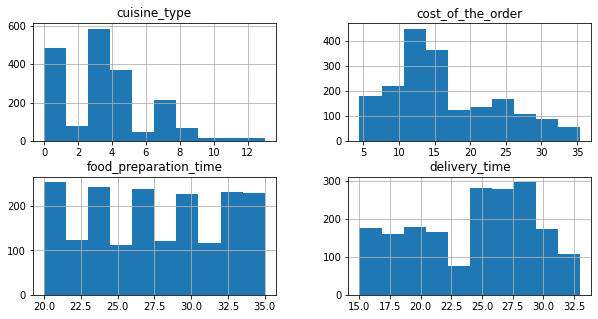

In [ ]:
X.hist(figsize = (10,5))

Splitting the dataset's rows

In [ ]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

Fitting Support Vector Machine to the dataset

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for train dataset
y_pred_train = clf.predict(X_train)
#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

Evaluation metrices values

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
# Model Accuracy: how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.7568517217146873
Test Accuracy: 0.7536842105263157


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Test Precision:",metrics.precision_score(y_test, y_pred_test))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Test Recall:",metrics.recall_score(y_test, y_pred_test))

Test Precision: 0.8010899182561307
Test Recall: 0.8698224852071006
